## What Are 'Fat-Head' Chains?
In this analysis, we're identifying which blockchains can be considered "fat-head chains" — meaning the most dominant and influential networks in the current ecosystem. These are the chains that account for the majority of activity and liquidity, and therefore play an outsized role in shaping the space.

To do this, we examine data from the CoinGecko Chains List, specifically focusing on dominance by Total Value Locked (TVL). The dataset has been directly sourced from CoinGecko, and we measure how much each chain contributes to the overall TVL in the ecosystem.

By ranking chains by TVL dominance and calculating their cumulative contribution, we can identify the "head" of the distribution - those few chains that capture most of the value - and compare them to the "long tail" of less dominant but still active networks.

In [186]:
import pandas as pd

# Raw data (truncated sample for illustration; actual processing would use the full input)
with open("data/chain_list.txt") as file:
    raw_data = file.read()

# Split the raw data into rows
rows = raw_data.strip()
rows = rows.split("\n")
all_rows = []
for row in rows:
    for r in row.split("\t"):
        if r:
            all_rows.append(r.strip())

# Define column names based on structure
columns = [
    "Rank", "Logo", "Chain", "Top Project 1", "Top Project 2", "Top Project 3",
    "7d Change", "30d Change", "90d Change", "24h Volume", "TVL", "Dominance", "Protocols", "Chart"
]

# Compute number of columns
n_cols = len(columns)

# Reshape the flat list into rows
data = [all_rows[i:i + n_cols] for i in range(0, len(all_rows), n_cols)]

# Create DataFrame
df = pd.DataFrame(data, columns=columns)
df = df.drop(
    columns=["Logo", "Top Project 1", "Top Project 2", "Top Project 3", "7d Change", "30d Change", "90d Change",
             "24h Volume", "Protocols", "Chart"])
# Cleanup
df = df.rename(columns={'Rank': 'rank', 'Chain': 'chain', 'TVL': 'tvl', 'Dominance': 'dominance'})

# correct type casting
df["dominance"] = df["dominance"].str.replace('%', '').astype(float) / 100
df["rank"] = pd.to_numeric(df["rank"])
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   rank       100 non-null    int64  
 1   chain      100 non-null    object 
 2   tvl        100 non-null    object 
 3   dominance  100 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.3+ KB


,rank,chain,tvl,dominance
0,1,Ethereum,"$51,605,217,638",0.5386
1,2,Solana,"$7,794,316,681",0.0814
2,3,Bitcoin,"$6,067,555,563",0.0633
3,4,BNB Smart Chain,"$5,938,100,741",0.0620
4,5,TRON,"$5,008,188,919",0.0523
...,...,...,...,...
95,96,WAX,"$986,263",0.0000
96,97,Elastos Smart Contract Chain,"$805,746",0.0000
97,98,SmartBCH,"$724,986",0.0000
98,99,Terra Classic,"$693,197",0.0000


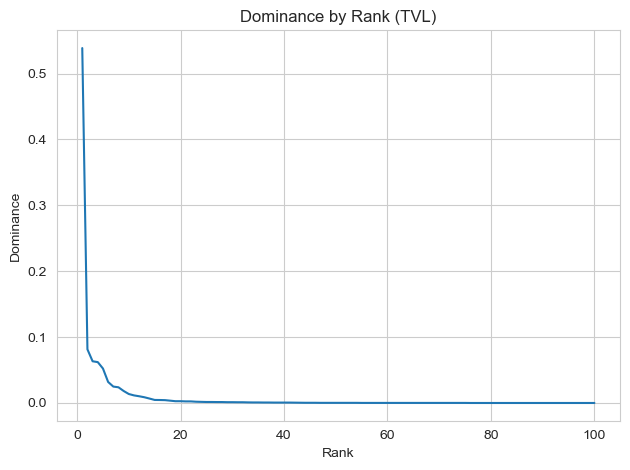

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(df, x='rank', y='dominance')
plt.title("Dominance by Rank (TVL)")
plt.xlabel("Rank")
plt.ylabel("Dominance")
plt.tight_layout()
plt.show()

In [188]:
# Sort by dominance descending to accumulate from highest dominance down
df_sorted = df.sort_values("dominance", ascending=False).reset_index(drop=True)

# Compute cumulative sum of dominance
df_sorted["dominance_cumsum"] = df_sorted["dominance"].cumsum()

# Get chains where cumulative dominance is below 99%
fat_heads = df_sorted[df_sorted["dominance_cumsum"] < 0.99]
fat_heads

,rank,chain,tvl,dominance,dominance_cumsum
0,1,Ethereum,"$51,605,217,638",0.5386,0.5386
1,2,Solana,"$7,794,316,681",0.0814,0.6200
2,3,Bitcoin,"$6,067,555,563",0.0633,0.6833
3,4,BNB Smart Chain,"$5,938,100,741",0.0620,0.7453
4,5,TRON,"$5,008,188,919",0.0523,0.7976
5,6,Base,"$3,059,371,468",0.0319,0.8295
6,7,Berachain,"$2,385,107,336",0.0249,0.8544
7,8,Arbitrum One,"$2,279,220,698",0.0238,0.8782
8,9,Sui,"$1,746,277,226",0.0182,0.8964
9,10,Avalanche,"$1,307,119,251",0.0136,0.9100


### Which fat-head chains are currently supported by Hyperlane?

In [189]:
# Mapping, we need to add more here in case we are missing some
mapping = {'sonicsvm': 'sonic',
           'solanamainnet': 'solana',
           'astar': 'starknet',
           'avalanche': 'avalanche',
           'berachain': 'berachain',
           'coredao': 'core',
           'cronos': 'cronos',
           'ethereum': 'ethereum',
           'blast': 'blast',
           'bob': 'bob network',
           'soneium': 'soneium',
           'base': 'base',
           'taiko': 'taiko',
           'unichain': 'unichain',
           'linea': 'linea',
           'arbitrum': 'arbitrum one',
           'sonic': 'sonic',
           'flare': 'flare network',
           'kava': 'kava',
           'mantle': 'mantle',
           'polygon': 'polygon pos',
           'sei': 'sei network',
           'gnosis': 'gnosis chain',
           'bsc': 'bnb smart chain'}

In [190]:
fat_head_chains = sorted(fat_heads['chain'].str.lower().tolist())

supported_fat_head_chains = []
for (domain_name, chain_name) in mapping.items():
    if chain_name in fat_head_chains:
        supported_fat_head_chains.append(chain_name)

supported_fat_head_chains

['sonic',
 'solana',
 'starknet',
 'avalanche',
 'berachain',
 'core',
 'cronos',
 'ethereum',
 'blast',
 'bob network',
 'soneium',
 'base',
 'taiko',
 'unichain',
 'linea',
 'arbitrum one',
 'sonic',
 'flare network',
 'kava',
 'mantle',
 'polygon pos',
 'sei network',
 'gnosis chain',
 'bnb smart chain']

### Which fat-head chains are currently not supported?

In [191]:
# Get all unique remote chains from df (normalize case)
all_remote_chains = set(fat_heads['chain'].dropna().str.lower().unique())

# Find unmatched chains
unmatched_remote_chains = sorted(all_remote_chains - set(supported_fat_head_chains))
unmatched_remote_chains

['aptos',
 'bitcoin',
 'cardano',
 'hedera hashgraph',
 'near protocol',
 'rootstock rsk',
 'stacks',
 'sui',
 'ton',
 'tron',
 'xrp ledger']

##### This code helps to automatically match chain name to domain name by suggesting a match

In [192]:
from rapidfuzz import process

domain_names = pd.read_csv("data/domain_names.csv")["domain_name"].unique().tolist()

# Match each local chain to the closest in your dataset
matches = {}
for domain in domain_names:
    best_match = process.extractOne(domain, fat_head_chains, score_cutoff=80)
    if best_match:
        matches[domain] = best_match[0]  # store best match

print(matches)

{'neutron': 'tron', 'sonicsvm': 'sonic', 'solanamainnet': 'solana', 'astar': 'starknet', 'avalanche': 'avalanche', 'berachain': 'berachain', 'coredao': 'core', 'cronos': 'cronos', 'cronoszkevm': 'cronos', 'ethereum': 'ethereum', 'blast': 'blast', 'bob': 'bob network', 'soneium': 'soneium', 'base': 'base', 'taiko': 'taiko', 'redstone': 'ton', 'unichain': 'unichain', 'linea': 'linea', 'arbitrum': 'arbitrum one', 'sonic': 'sonic', 'flare': 'flare network', 'kava': 'kava', 'mantle': 'mantle', 'polygon': 'polygon pos', 'sei': 'sei network', 'gnosis': 'gnosis chain'}
